# Investigating Fandango Movie Ratings

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis.

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.


In [1]:
import pandas as pd
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_previous = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

This could be due to the fact that the dataset has specific sampling characteristics:
For Fandango sampling have:
- At least 30 fan reviews on Fandango
- Contains a rating or score in Rotten Tomatoes, RT User, Metacritic, Metacritic User and IMDb.
- The data from Fandango was pulled on Aug. 24, 2015

For Movie ratings have:
- Most popular movies (with a significant number of votes).
- Mostly for movies released in 2016 

It's unlikely to be representative of our population of interest.

## Changing the Goal of our Analysis

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## 4. Isolating the Samples We Need
With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

Great, now let's isolate the movies in the other data set.

In [3]:
sum(fandango_previous['Fandango_votes'] < 30)

0

We can see that all the movies have more than 30 reviews.

We'll isolate the movies released in 2015.
For `fandango previous` we need to extract the year values from `FILM` column, the pattern are `Film name (year:int)`. 

In [4]:
fandango_previous['FILM'].value_counts()
pattern = r'\((.*)\)'
fandango_previous['Year'] = fandango_previous['FILM'].str.extract(pattern, expand=False).astype(int)
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [5]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == 2015].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now we'll isolate the movies released in 2016 in the other data set.

In [6]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [7]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

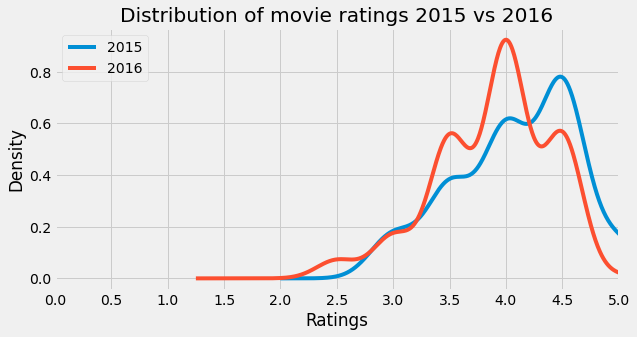

In [9]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of movie ratings 2015 vs 2016')
plt.xlabel('Ratings')
plt.xlim(0, 5)
plt.xticks(np.arange(0,5.5,0.5))
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True,figsize = (9,4.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.show()

We can see that the distribution of the results tends to have high ratings (skewed to the right), this may be because the sampling of the data sets comes from popular movies. 

We see changes in ratings between the two time periods. Ratings in 2016 were slightly lower than in 2015. This is evidence that there was a change in movie ratings on Fandango. 

## Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

Because the samples have a different number of movies.  We'll  use the tables of relative frequencies

In [10]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True) *100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [11]:
fandango_2016['fandango'].value_counts(normalize=True) *100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

In 2015 around 73.6% of the films obtained a high rating (between 4 and 5 stars). For 2016, the percentage of movies with a high rating was around 65.4%. We can see the slight difference that we saw with the previous graph. 

In 2016, less than 1% (0.54%) of the films obtained a 5-star rating, while in 2015 practically 7% obtained this rating.

In 2016 the lowest rating was 2.5 stars, while in 2015 it was 3 stars. That could be indications of rounding problems presented by the platform.

## Determining the Direction of the Change

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

In [12]:
stars_2015 = fandango_2015['Fandango_Stars']
statistics_2015 = [stars_2015.mean(), stars_2015.median(), stars_2015.mode()] 

In [13]:
stars_2016 = fandango_2016['fandango']
statistics_2016 = [stars_2016.mean(), stars_2016.median(), stars_2016.mode()] 

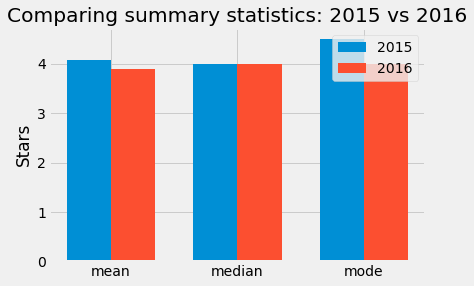

In [16]:
labels = ['mean', 'median', 'mode']
x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots()
bar_2015 = ax.bar(x - width/2, statistics_2015, width, label='2015')
bar_2016 = ax.bar(x + width/2, statistics_2016, width, label='2016')


ax.set_ylabel('Stars')
ax.set_title('Comparing summary statistics: 2015 vs 2016')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

We can see that the median is the same for the two distributions. For the mean and the mode we can see that the statistics are slightly lower. Which tells us that on average 2016 movies had slightly lower ratings.

## Conclution
